In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
# import cv2
import pandas as pd
from PIL import Image, ImageFilter

import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras import backend as K
from keras.callbacks import TensorBoard

import tensorflow as tf

Using TensorFlow backend.


In [2]:
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend" #for GPU Support on MacBook
print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

1.13.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14260629201793008950
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4945621811
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7327132418249425210
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
currentDir = os.getcwd()
datasetDir = currentDir + "\\FilteredImages\\"
# datasetDir = currentDir + "/FilteredImages2/" # NEW SINGLE IMAGES DIRECTORY
trainDir = os.path.join(datasetDir, "train")
testDir = os.path.join(datasetDir, "test")
validDir = os.path.join(datasetDir, "valid")
y_dataDir = os.path.join(datasetDir, "y_data")

In [5]:
def sortFirst(val):
    return val[0]

def getBinary(dataFile):
    listOfTraining = []
    trainingHeader = []
    with open(dataFile) as csvfile:
#     reader = csv.DictReader(csvfile)
        reader2 = csv.reader(csvfile)
        listOfTraining = list(reader2)
        trainingHeader = listOfTraining[0]
        listOfTraining.pop(0)
#         listOfTraining = listOfTraining.sort(key = sortFirst, reverse = False)
#         np.asarray(listofTraining, dtype=np.int32)
#         return np.asarray(listofTraining, dtype=np.int32)
    listOfTrainingBinary = []
    for item in listOfTraining:
        listOfTrainingBinary.append(item[1])
    return np.asarray(listOfTrainingBinary, dtype=np.int32)

In [6]:
y_train = []
y_trainDir = os.path.join(y_dataDir, 'train_split_Depression_AVEC2017-edited.csv')
# print(y_trainDir)
y_train = getBinary(y_trainDir)
y_testDir = os.path.join(y_dataDir, 'dev_split_Depression_AVEC2017.csv')
# print(y_testDir)
y_test = getBinary(y_testDir)
print(y_train)
print(y_test)

# Y_train = np.asarray(y_train, dtype=np.int32)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]


In [7]:
x_trainDir = trainDir
x_testDir = testDir

In [8]:
x_trainDir

'C:\\Users\\tanho\\Downloads\\Aaron-Workspace\\FilteredImages\\train'

In [9]:
# testSet = []
# testFolders =[]
# # trainingSet = []
# trainingFolders = []
# x_train = []
# y_train = []

def getImagesDir(mainDirectory):
    ImgDict = {}
    ImgList = []
    
    for folder in os.listdir(mainDirectory):
        theDir = os.path.join(mainDirectory, folder)
        images = os.listdir(theDir)
        listOfImgDir = []
        for img in images:
#             listOfImgDir.append(Image.open(os.path.join(theDir, img)))
            listOfImgDir.append(os.path.join(theDir, img))
#         print(listOfImgDir)
#         print(images)
        folderName = folder.split('_')
        ImgDict[folderName[0]] = listOfImgDir
        ImgList.append(listOfImgDir)
    imgList = ImgList.sort(key = sortFirst, reverse = False)
    return ImgList
        
        
#         for img in images
    
# for folder in toProcessList:
#     images = os.listdir(datasetDir + "/" + folder)
#     folderName = folder.split('_')
# #     print(folderName[0])
#     if folderName[0] in listOfTrainingName:
#         trainingFolders.append(datasetDir + "/" + folder)
# #         print(folderName)
#         index = listOfTrainingName.index(folderName[0])
#         temp = listOfTraining[index]
#         x_train.append(images)
#         tempBList = []
#         val = temp[1]
#         tempBList.append(val)
#         y_train.append(tempBList)
#         #temp.append(images)
#         #trainingSet.append(temp)
#     else:
#         testFolders.append(datasetDir + "/" + folder)
#         testSet.append(images)

trainingImagesDir = getImagesDir(trainDir)
testImagesDir = getImagesDir(testDir)
# np.array(trainingImages).shape

In [10]:
def importImages(listOfImgDir):
    myFolder = []
    for folder in listOfImgDir:
        myImages = []
        for image in folder:
            myImages.append(np.array(Image.open(image)))
        myFolder.append(np.array(myImages))
    return myFolder


#First Array iterate through Folder, Second Array Iterate though Image in Folder
trainingImages = importImages(trainingImagesDir)
testImages = importImages(testImagesDir)

In [11]:
#Num of Img, Height, Width
print(len(trainingImages)) 

len(y_train)

107


107

In [12]:
trainingImagesNP = np.array(trainingImages)
testImagesNP = np.array(testImages)

In [13]:
# print(trainingImages.shape)
# print(trainingImages[0])
# print(trainingImagesNP[10].shape)
# print(y_train)

neg = []
y_neg = []
pos = []
y_pos = []

for x,y in zip(trainingImages, y_train):
    if (y == 0):
        for each in x:
            neg.append(each)
            y_neg.append(0)
    else:
        for each in x:
            pos.append(each)
            y_pos.append(1)

X = pos + neg
Y = y_pos + y_neg

In [14]:
neg_test = []
y_neg_test = []
pos_test = []
y_pos_test = []

for x,y in zip(testImages, y_train):
    if (y == 0):
        for each in x:
            neg_test.append(each)
            y_neg_test.append(0)
    else:
        for each in x:
            pos_test.append(each)
            y_pos_test.append(1)

X_test = pos_test + neg_test
Y_test = y_pos_test + y_neg_test


npX_test = np.array(X_test)
npY_test = np.array(Y_test)
newNPX_test = npX_test.reshape(npX_test.shape[0], 101, 1000, 1)

In [15]:
vImagesDir = getImagesDir(validDir)
vImages = importImages(vImagesDir)
vImagesNP = np.array(vImages)

#TESTING DATA UNSEEN DATA
v = []
# y_neg_v = []
# pos_v = []
# y_pos_v = []

for x in vImages:
    for each in x:
        v.append(each)

# X_v = pos_v + neg_v
# Y_v = y_pos_v + y_neg_v


np_v = np.array(v)
# npY_test = np.array(Y_test)
newNPX_v = np_v.reshape(np_v.shape[0], 101, 1000, 1)

In [16]:
npX = np.array(X)
npY = np.array(Y)

In [17]:
print(npX.shape)
print(npY.shape)

(4591, 101, 1000)
(4591,)


In [18]:
newNPX = npX.reshape(npX.shape[0], 101, 1000, 1)

In [19]:
print(newNPX.shape)

(4591, 101, 1000, 1)


In [22]:
# from keras.preprocessing.image import ImageDataGenerator

In [23]:
#Saving Model
from keras.callbacks import ModelCheckpoint
#numEpochs = 100
numEpochs = 25
model_path = os.path.join(currentDir,'DAM-DHM-V-'+ str(numEpochs) +'.h5')

# checkpoint = ModelCheckpoint(model_path, monitor='loss', verbose=1, save_best_only=True, mode='max')

# checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=True, mode='max')

checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=False, save_weights_only=False, mode='auto')
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

callbacks_list = [checkpoint, tbCallBack]

In [25]:
input_shape = (101, 1000, 1)

In [26]:
# DR HARRY
from keras.callbacks import EarlyStopping

def evaluate_model(X_train, X_val, y_train, y_val):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))

    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta', #adam
                  metrics=['accuracy']) 
    
    print(model.metrics_names)
    
    model.save_weights('model.h5')
    
    callbacks = [EarlyStopping(monitor='val_acc', patience = 10)]
    
    hist=model.fit(x=X_train, y=y_train, batch_size=32, epochs=numEpochs, callbacks=callbacks_list, validation_data=(X_val, y_val))
    
    _, val_acc=model.evaluate(x=X_val, y=y_val, verbose=1)
  
    model.load_weights('model.h5')
    
    model.summary()
    
    print("acc: ", np.mean(hist.history['acc']))
    
    print("val_acc: ", val_acc)
    
    model.save(''+ str(numEpochs) +' Epoch (Dr Harry Model) w validation.h5')
    
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()
    
    return model, val_acc

Instructions for updating:
Colocations handled automatically by placer.
['loss', 'acc']
Instructions for updating:
Use tf.cast instead.
Train on 4591 samples, validate on 1740 samples
Epoch 1/25
4591/4591 [==============================] - 38s 8ms/step - loss: 0.6616 - acc: 0.7123 - val_loss: 0.7256 - val_acc: 0.5902

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 2/25
4591/4591 [==============================] - 33s 7ms/step - loss: 0.5987 - acc: 0.7188 - val_loss: 0.6837 - val_acc: 0.5902

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 3/25
4591/4591 [==============================] - 33s 7ms/step - loss: 0.5998 - acc: 0.7188 - val_loss: 0.6997 - val_acc: 0.5902

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 4/25
4591/4591 [==============================] - 33s 7ms/step - loss: 0.5954 - acc: 0.7188 - val_loss: 0.7274 - val_acc: 0.5902

Epoch 00004: s

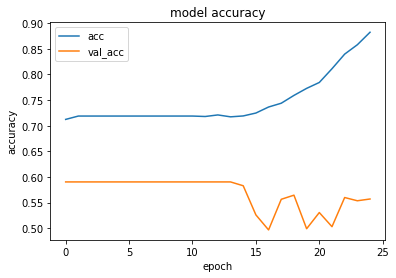

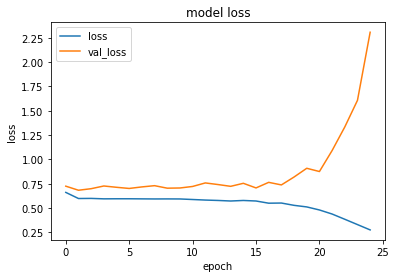

In [27]:
# run CNN model
model, val_acc = evaluate_model(newNPX, newNPX_test, npY, npY_test) 

['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6443 - acc: 0.7144 - val_loss: 0.6291 - val_acc: 0.7326

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 2/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6024 - acc: 0.7173 - val_loss: 0.7181 - val_acc: 0.7326

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 3/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.5987 - acc: 0.7173 - val_loss: 0.5851 - val_acc: 0.7326

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 4/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.5969 - acc: 0.7173 - val_loss: 0.5846 - val_acc: 0.7326

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 5/25
4131/4131 [===========================

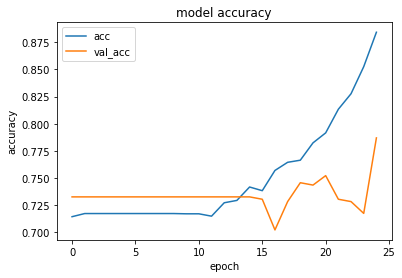

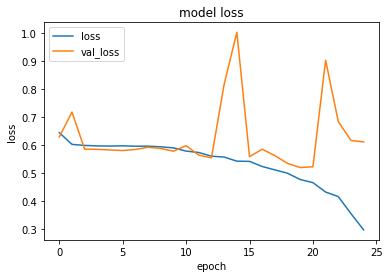

K-Fold has ran  1  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6455 - acc: 0.7105 - val_loss: 0.6268 - val_acc: 0.7370

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 2/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6063 - acc: 0.7168 - val_loss: 0.5995 - val_acc: 0.7370

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 3/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6006 - acc: 0.7168 - val_loss: 0.5769 - val_acc: 0.7370

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 4/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.5998 - acc: 0.7168 - val_loss: 0.5937 - val_acc: 0.7370

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 5/25
4131/4131 [

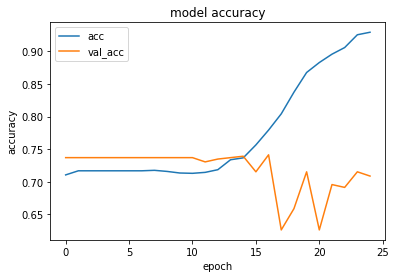

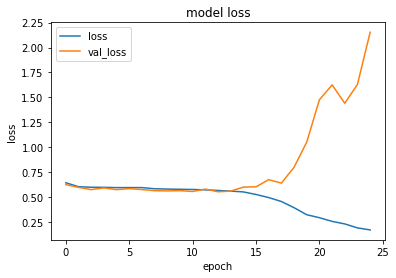

K-Fold has ran  2  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6643 - acc: 0.7083 - val_loss: 0.6144 - val_acc: 0.7283

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 2/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6000 - acc: 0.7177 - val_loss: 0.5929 - val_acc: 0.7283

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 3/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.6061 - acc: 0.7177 - val_loss: 0.5883 - val_acc: 0.7283

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 4/25
4131/4131 [==============================] - 28s 7ms/step - loss: 0.5955 - acc: 0.7177 - val_loss: 0.6306 - val_acc: 0.7283

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 5/25
4131/4131 [

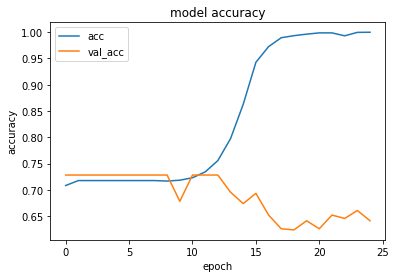

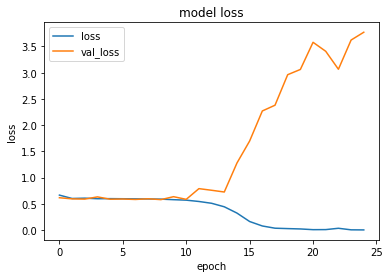

K-Fold has ran  3  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/25
4131/4131 [==============================] - 41s 10ms/step - loss: 0.6542 - acc: 0.7141 - val_loss: 0.6002 - val_acc: 0.7370

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 2/25
4131/4131 [==============================] - 52s 13ms/step - loss: 0.6111 - acc: 0.7168 - val_loss: 0.5948 - val_acc: 0.7370

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 3/25
4131/4131 [==============================] - 48s 12ms/step - loss: 0.5984 - acc: 0.7168 - val_loss: 0.5782 - val_acc: 0.7370

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 4/25
4131/4131 [==============================] - 48s 12ms/step - loss: 0.5980 - acc: 0.7168 - val_loss: 0.5764 - val_acc: 0.7370

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-25.h5
Epoch 5/25
4131/41

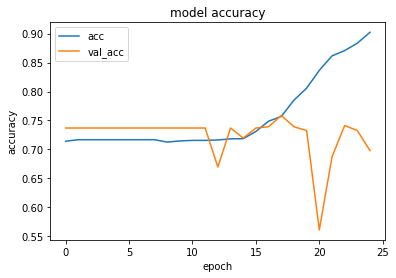

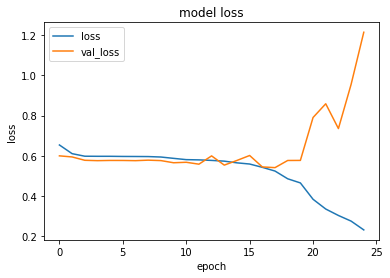

K-Fold has ran  4  time(s)

Model Accuracy after all K-Fold:  0.7086956523034884


In [28]:
# k-fold cross validation, k = n_folds

n_folds = 4
count = 0
cv_scores, model_history = list(), list()
for _ in range(n_folds):
    # split data
    X_train, X_val, y_train, y_val = train_test_split(newNPX, npY, test_size=0.10, random_state = np.random.randint(1,1000, 1)[0])
    # evaluate model
    model, test_acc = evaluate_model(X_train, X_val, y_train, y_val)
    count += 1
    cv_scores.append(test_acc)
    model_history.append(model)
    print('K-Fold has ran ', count, ' time(s)')
    
print('\nModel Accuracy after all K-Fold: ', (np.mean(cv_scores)))

In [29]:
result = model.predict(newNPX_v)
for each in result:
    print(each)

[0.49341837]
[0.46915367]
[0.47077915]
[0.47702745]
[0.531302]
[0.5144968]
[0.4482516]
[0.40917772]
[0.47234544]
[0.49918953]
[0.48915902]
[0.45599264]
[0.47051567]
[0.46608672]
[0.481044]
[0.4655315]
[0.47878644]
[0.45674124]
[0.468885]
[0.46892378]
[0.48136127]
[0.5146304]
[0.48740396]
[0.4694358]
[0.5131279]
[0.44653627]
[0.5203465]
[0.45150742]
[0.49193764]
[0.50090486]
[0.4595074]
[0.48467937]
[0.44167668]
[0.4458036]
[0.49830344]
[0.49824306]
[0.45234165]
[0.47317526]
[0.48869738]
[0.50089544]
[0.45625854]
[0.46346194]
[0.5142934]
[0.4663614]
[0.4662803]
[0.48805183]
[0.47484204]
[0.5307008]
[0.48590645]
[0.47850898]
[0.50424963]
[0.4469927]
[0.5065729]
[0.50815886]
[0.45554194]
[0.49387622]
[0.4843377]
[0.47282737]
[0.5017219]
[0.49027753]
[0.47042957]
[0.46566147]
[0.46785828]
[0.4878035]
[0.50099754]
[0.48311183]
[0.48092863]
[0.4529485]
[0.47502664]
[0.49689597]
[0.47905117]
[0.47088504]
[0.4907066]
[0.4883866]
[0.47205007]
[0.49724114]
[0.48291788]
[0.46394005]
[0.4752157]
[

[0.48381332]
[0.4876717]
[0.46115]
[0.4934054]
[0.46150607]
[0.47856963]
[0.5034372]
[0.50097096]
[0.5047902]
[0.48673892]
[0.47597587]
[0.4798896]
[0.4804963]
[0.4824937]
[0.47959185]
[0.517698]
[0.46441424]
[0.46304086]
[0.49808204]
[0.44809884]
[0.45967072]
[0.49970824]
[0.44234997]
[0.49126166]
[0.43782404]
[0.49206635]
[0.48217514]
[0.4982856]
[0.49157268]
[0.4819368]
[0.44636828]
[0.4581037]
[0.46373487]
[0.49328533]
[0.5168941]
[0.46039993]
[0.48792854]
[0.5030355]
[0.47633007]
[0.49877712]
[0.4649401]
[0.45652372]
[0.46818826]
[0.44625717]
[0.47889107]
[0.45391622]
[0.465111]
[0.47407445]
[0.44795737]
[0.46251103]
[0.499583]
[0.5122226]
[0.49560204]
[0.52866524]
[0.45889136]
[0.47460428]
[0.47846553]
[0.49047628]
[0.44605565]
[0.50595367]
[0.46964863]
[0.48597094]
[0.49649495]
[0.51023144]
[0.53609866]
[0.46101758]
[0.47503832]
[0.46813866]
[0.4893709]
[0.48535416]
[0.44469765]
[0.482756]
[0.51636297]
[0.44412768]
[0.50153756]
[0.48810965]
[0.4852584]
[0.46226096]
[0.50496745]


In [30]:
np.mean(cv_scores)

0.7086956523034884